In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.sparse as sparse # routines for sparse matrices
import scipy.sparse.linalg as LAs # 
%matplotlib inline

(0, 2)

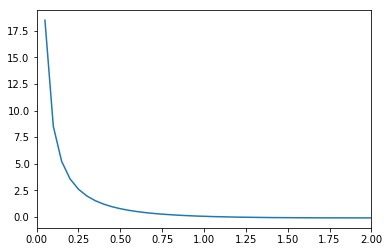

In [6]:
Potgerade=np.loadtxt("H2p_pot_gerade.dat",unpack=True)
plt.plot(Potgerade[0],Potgerade[1])
plt.xlim(0,2)

(0, 1)

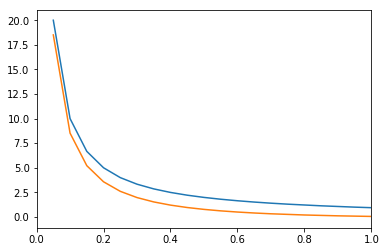

In [7]:
Potungerade=np.loadtxt("H2p_pot_ungerade.dat",unpack=True)
plt.plot(Potungerade[0],Potungerade[1])
plt.plot(Potgerade[0],Potgerade[1])
plt.xlim(0,1)
plt.xlim(0,1)

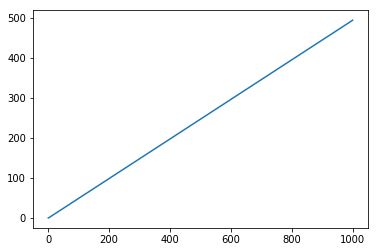

In [8]:
Potungerade=np.loadtxt("dipole_coupling.dat",unpack=True)
plt.plot(Potungerade[0],Potungerade[1])
#plt.xlim(0,10)
#plt.plot(Potgerade[0],Potgerade[1])
#plt.xlim(0,1)
#plt.xlim(0,1)

## Vibrational Eigenstates of H2+

To calculate the vibrational $H_2^+$ Eigenstates the proton and electron movement is assumed to be independent according to the Born-Oppenheimer approximation. The Interaction potential of the two protons is given by an anharmonic oscillator of the form $V(R)=D_e \cdot [1-e^{-a\cdot(R-R_e)^2}]$

In [51]:
def Interactionpotential(R,De=10,a=0.3,Re=2):
    return De*(1-np.exp(-a*(R-Re)))**2


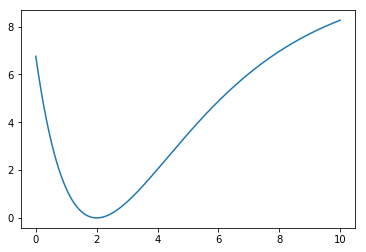

In [52]:
x=np.linspace(0,10,1000)
plt.plot(x,Interactionpotential(x))

In [53]:
L = 20
npoints = 401
dx = L/(npoints - 1)
xvals = np.linspace(0,L,npoints)

# terms of the Hamiltonian
Vvec = Interactionpotential(xvals)
HkinDiag = np.ones(npoints)/dx**2
Hkinofdiag = -0.5*np.ones(npoints-1)/dx**2
Hsparse = sparse.diags([Hkinofdiag, HkinDiag + Vvec, Hkinofdiag],[-1,0,1])
#print(Hsparse.toarray())

e, v = sparse.linalg.eigsh(Hsparse, k=10, which='SM')

In [54]:
print(e)

[0.66055495 1.91716819 3.09114832 4.18295661 5.18940241 6.10570469
 6.9276016  7.65227577 8.27839063 8.80578274]


0.6605549466624682
1.917168190212842
3.0911483204964836
4.182956608478864
5.189402414922919
6.1057046931934496
6.92760159561739
7.6522757676150635
8.278390627687873
8.805782740741263


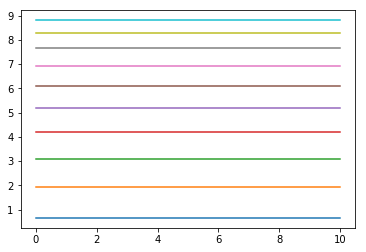

In [55]:
#plt.plot(x,Interactionpotential(x))
for j in e:
    print(j)
    plt.plot(x,j*np.ones(len(x)))

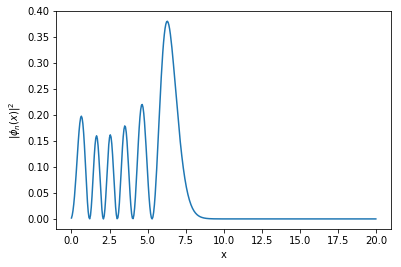

In [59]:
plt.plot(xvals,np.abs(v[:,5])**2/dx)
plt.xlabel("x")
plt.ylabel("$|\phi_n(x)|^2$");